# PHY407 Lab 2

## Q1

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def fwd_dif(x,hs):
    results=[]
    for i in hs:
        results.append((np.exp(-(x+i)**2) - np.exp(-(x)**2))/((x+i) - x))
    return results

In [17]:
hs=[10**(-16),10**(-15),10**(-14),10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0)]

In [19]:
results=fwd_dif(0.5,hs)

In [20]:
analytical_answer=-2*(0.5)*np.exp(-(0.5)**2)

### b)

In [21]:
derivative_error=np.abs(np.array(results)-analytical_answer)

### c)

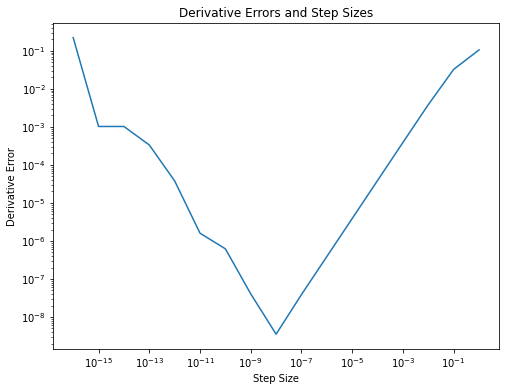

In [35]:
plt.figure(figsize=[8,6])
plt.plot(hs,derivative_error)
plt.title('Derivative Errors and Step Sizes')
plt.xlabel('Step Size')
plt.ylabel('Derivative Error')
plt.yscale('log')
plt.xscale('log')
plt.show()

The plot clearly shows a minimum derivative error at a step size of $10^{-8}$. This value agrees with the text's optimum step size for forward difference differentiation of $\sqrt{C} \approx 10^{-8}$. Noting Equation 5.91: $\epsilon = \frac{2C \lvert(f(x)\rvert}{h} + \frac{1}{2} h \lvert f''(x)\rvert$,  and the fact the the text states that the first term in equation 5.91 represents the rounding error while the second term represents the truncation error, we can determine when each dominates. When h is very small, the first term in equation 5.91 will dominate the error, therefore on the plot the rounding error dominates to the left of the minimum. Thus, to produce a turning point the truncation error must dominate to the right of the minimum on the plot 

### d)

In [42]:
def cntrl_dif(x,hs):
    results=[]
    comp=[]
    for i in hs:
        results.append((np.exp(-(x+i)**2) - np.exp(-(x-i)**2))/((x+i) - (x-i)))
        comp.append((np.exp(-(x+i)**2) - np.exp(-(x-i)**2), (x+i) - (x-i)))
    return results, comp

In [44]:
results_cntrl,comp=cntrl_dif(0.5,hs)

In [32]:
derivative_error_cntrl=np.abs(np.array(results_cntrl)-analytical_answer)

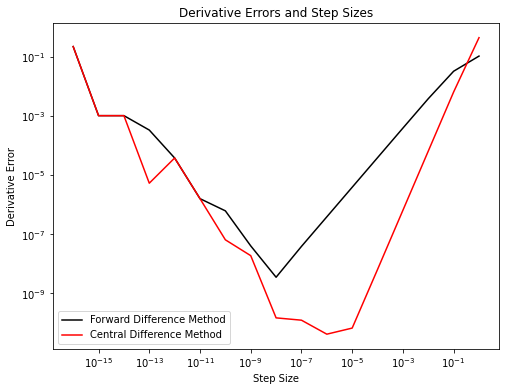

In [40]:
plt.figure(figsize=[8,6])
plt.plot(hs,derivative_error,label='Forward Difference Method',color='black')
plt.plot(hs,derivative_error_cntrl,label='Central Difference Method',color='red')
plt.title('Derivative Errors and Step Sizes')
plt.xlabel('Step Size')
plt.ylabel('Derivative Error')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

Firstly note that although the central difference method (CDM) of calculating the derivative of $f(x)=e^{-x^{2}}$ at $x=0.5$ isn't always more accurate than the forward difference method (FDM), with the optimal choice of step size for each method the CDM is approximately a factor of $10^{2}$ more accurate. This is shown qualitatively in the plot as the CDM has a minimum that reaches deeper than the FDM. However, the plot also displays steps sizes where the FDM and the CDM are equally accurate, such as at steps sizes of $10^{-16}, 10^{-15}, 10^{-14}, 10^{-12}, 10^{-11}$ and somewhere between $10^{-1}$ and $10^{0}$.

Secondly, note that the optimal step size of each method is different. Whereas we have seen that the optimal step size for the FDM occurs at $10^{-8}$, for the CDM the optimal step size occurs at $10^{-6}$. This is shown qualitativly in the plot as the FDM and CDM reach minimums at different x-axis locations.

Finally, note that the behaviour of the CDM error is more complex than the behaviour of the FDM. The plot of the error with the CDM has two minimums, the global minimum at $10^{-6}$ and a different local minimum at $10^{-13}$, while the plot of the error with the FDM only has one.